Classification: Decision Tree
Dataset: pima-indians-diabetes.csv Create & 
evaluate the decision tree.
Test the decision tree for any random sample.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
dataset = pd.read_csv("pima-indians-diabetes.csv")

In [80]:
dataset

,pregnancies,Glucose,BP,skin Thickness,insulin,BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
dataset.eq(0).sum()

pregnancies                   111
Glucose                         5
BP                             35
skin Thickness                227
insulin                       374
BMI                            11
Diabetes pedigree function      0
Age                             0
Class                         500
dtype: int64

In [82]:
dataset.corr()

,pregnancies,Glucose,BP,skin Thickness,insulin,BMI,Diabetes pedigree function,Age,Class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [83]:
X = dataset.drop(columns=['BP','skin Thickness','Class'],axis =1 )
y=dataset.iloc[:,-1]


In [84]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(X[['BMI']])
X[['BMI']] = imputer.transform(X[['BMI']])

In [85]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(random_state=0)

# train the model
model.fit(X_train,y_train)

# making predictions on Test Set
y_pred= model.predict(X_test)

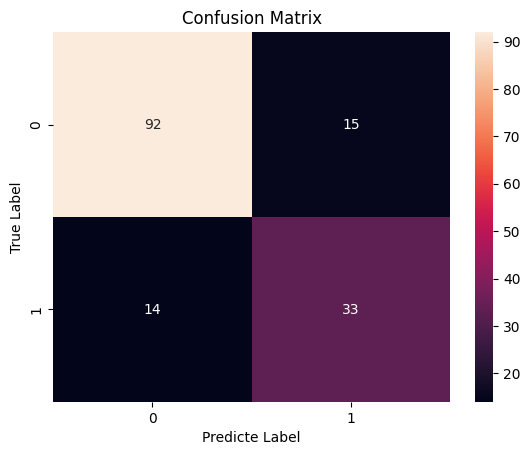

Accuracy :  0.8117


In [87]:
# Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
confmatrix = confusion_matrix(y_test,y_pred)

import seaborn as sns
sns.heatmap(confmatrix , annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicte Label")
plt.ylabel("True Label")
plt.show()

print(f"Accuracy : {accuracy: .4f}")


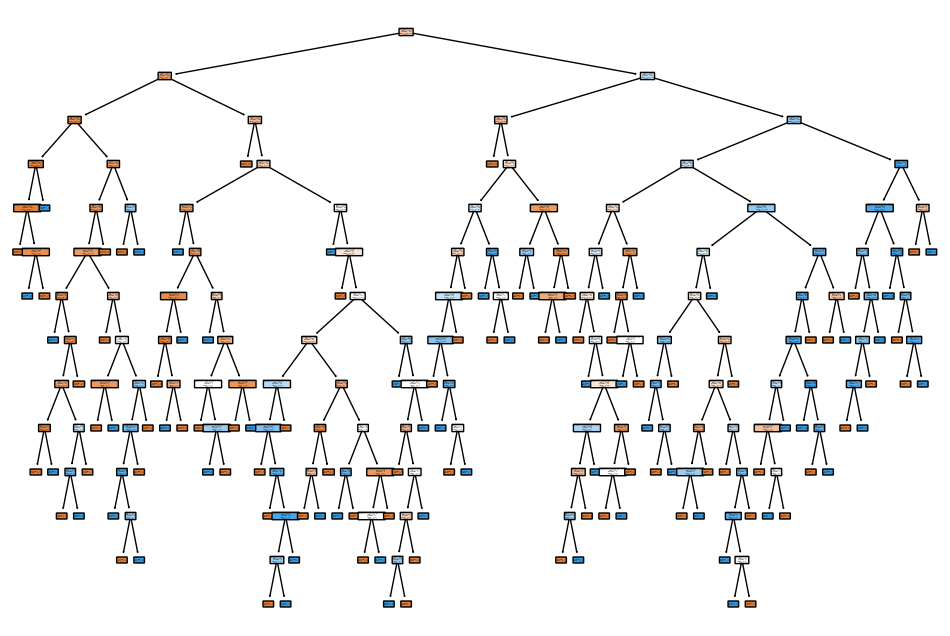

In [92]:
#visualise the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [90]:
# Testing on Random sample

random_sample_index = X.sample(1 ,random_state=42).index[0]
random_sample = X.loc[random_sample_index].values.reshape(1,-1)
random_sample_class = y.loc[random_sample_index]

random_sample_pred_class = model.predict(random_sample)

print(f"Actual : {random_sample_class}")
print(f"Prediction : {random_sample_pred_class}")

Actual : 0
Prediction : [0]


c:\Users\soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
